<a href="https://colab.research.google.com/github/TheMathAI/COMP551/blob/main/mini_project_1_data_cleaning_boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading data from github
url = 'https://raw.githubusercontent.com/TheMathAI/COMP551/main/mini_project_1/data/boston.csv'

df = pd.read_csv(url, encoding='unicode_escape')

# drop column 'B'
df = df.drop('B', axis=1)

# look if there is any null value in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB


Every feature is formated as an interger or a float and there is no null values.

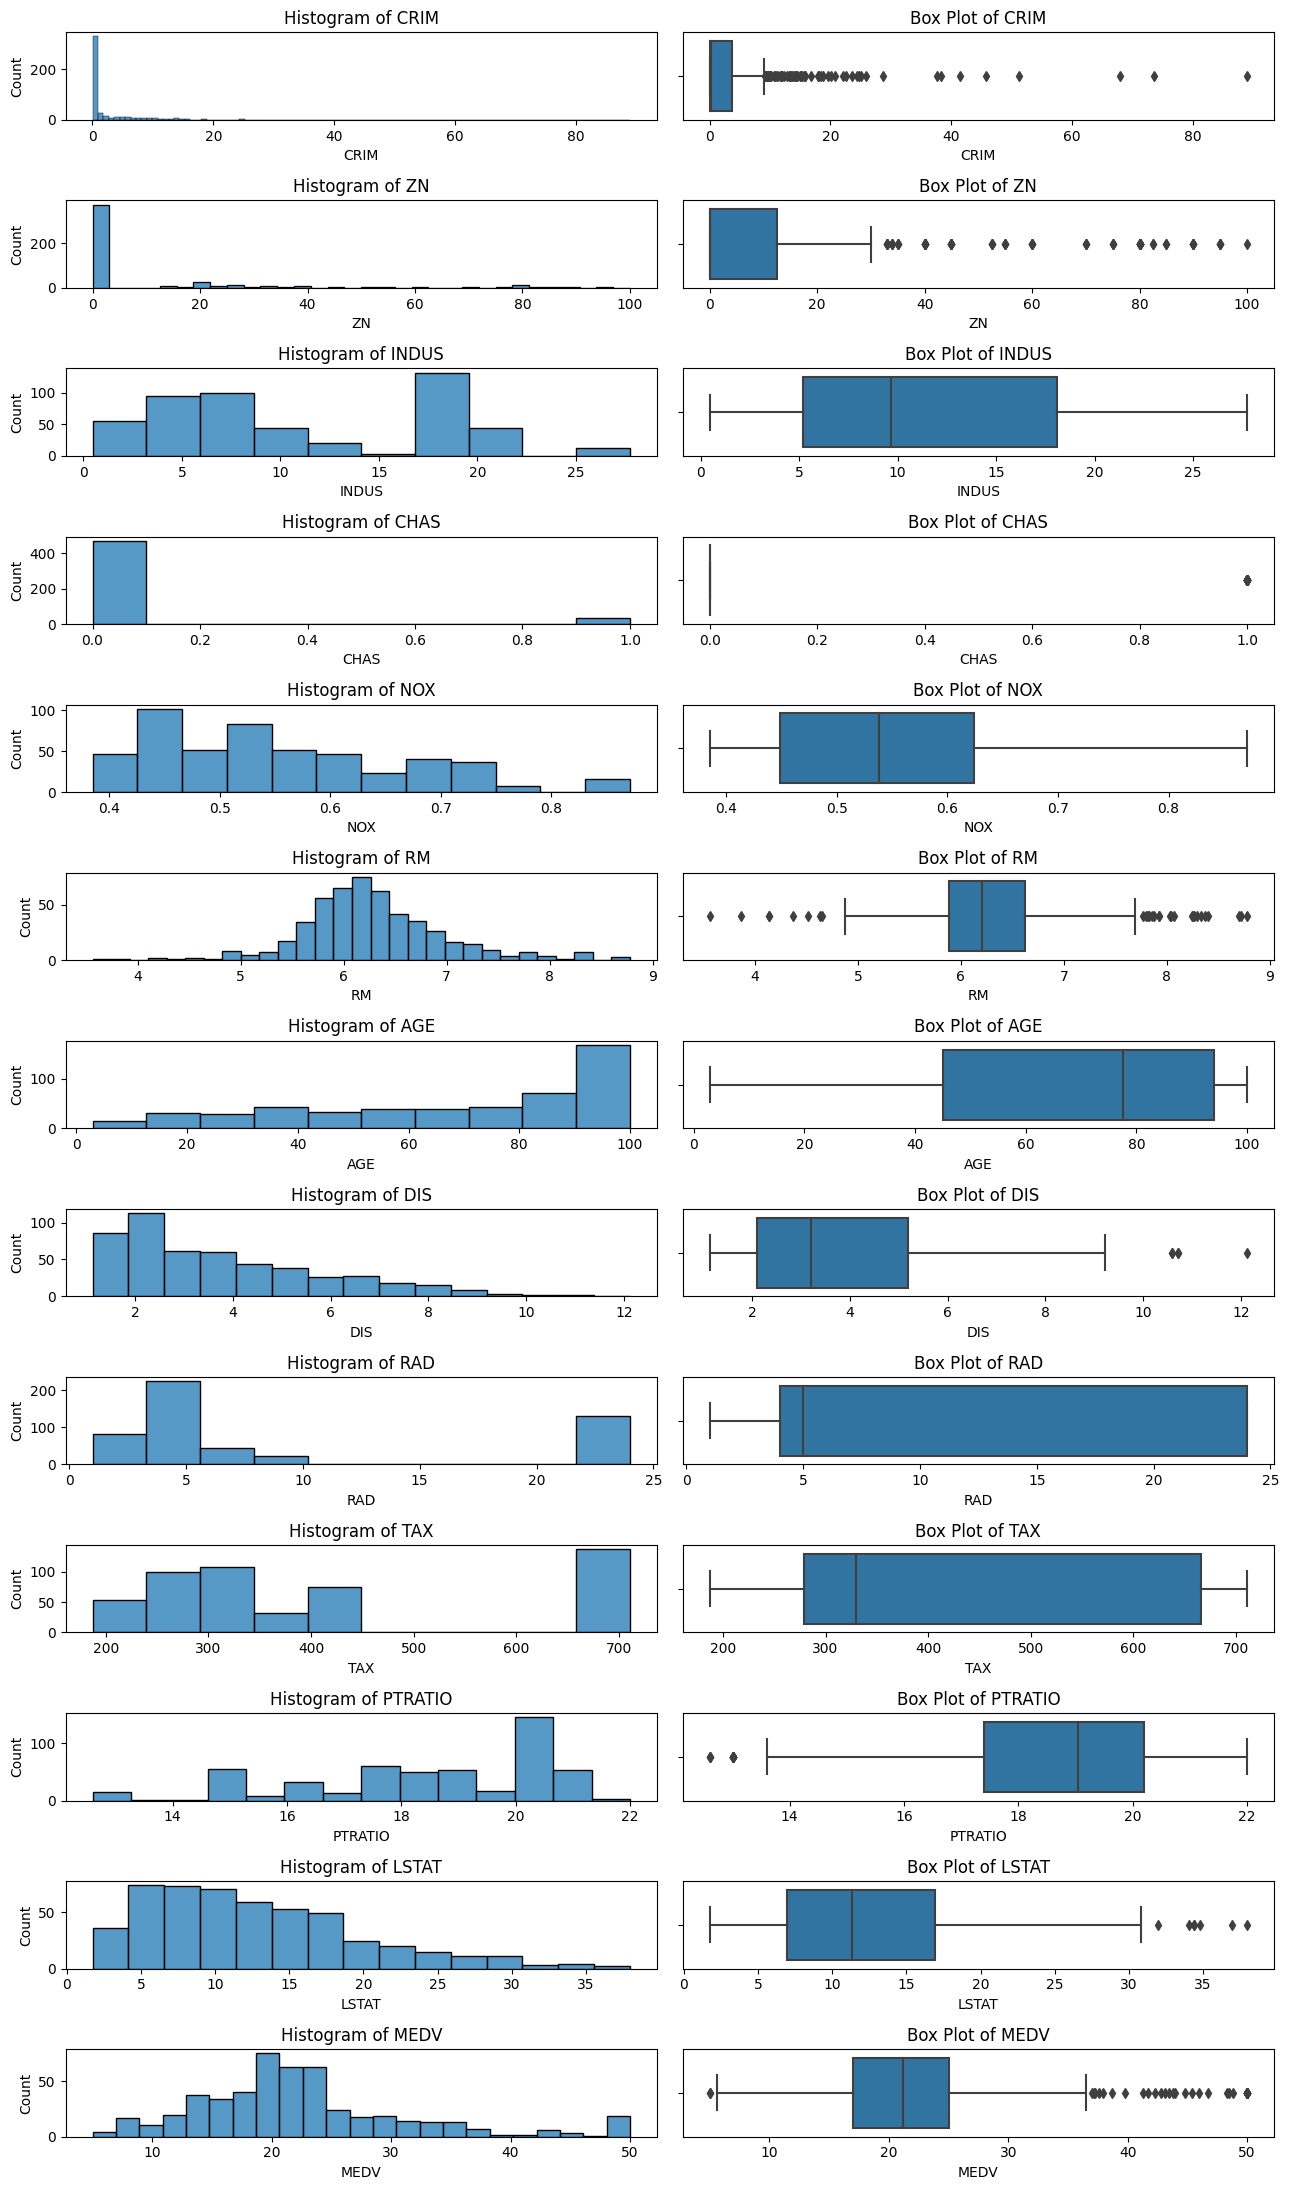

In [ ]:
# Set the number of subplots based on the number of columns (2 plots per column)
num_cols = len(df.columns)
num_rows = 13

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(13, 22), sharex=False)

# Iterate through each column and create histograms and box plots
for i, col in enumerate(df.columns):
    # Create a histogram
    sns.histplot(df[col], ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {col}')

    # Create a box plot
    sns.boxplot(x=df[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot of {col}')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

Variables that contains many outliers or extreme observations: MEDV, LSTAT, RM, CHAS, ZM and CRIM.

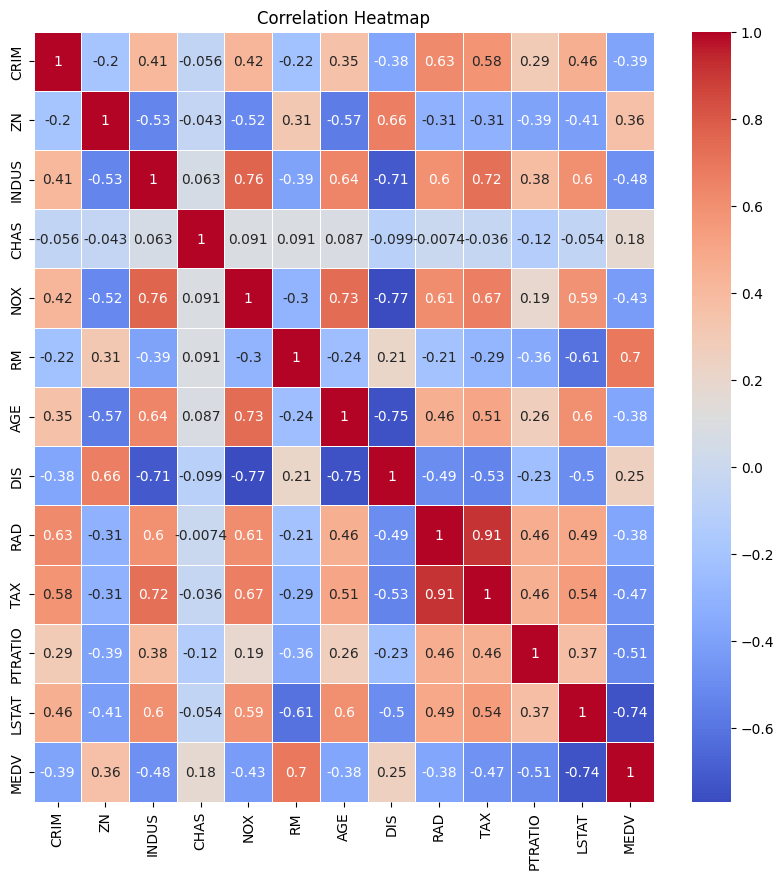

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Calculate statistics using describe() method
statistics = df.describe()

# Calculate the mode separately
mode = df.mode().iloc[0]

# Add mode to the statistics DataFrame
statistics.loc['mode'] = mode

statistics

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000
mode,0.015010,0.000000,18.100000,0.000000,0.538000,5.713000,100.000000,3.495200,24.000000,666.000000,20.200000,6.360000,50.000000


In [ ]:
df.to_csv('boston_c.csv', index=False)